In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
x = files.upload()

Saving Data(2).csv to Data(2) (1).csv


In [ ]:
df = pd.read_csv("Data(2).csv")

In [ ]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,11.4,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,19.8,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,12.7,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,9.0,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,9.3,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,Thaddeus Young,PF,34,TOR,54,9,795,108,198,...,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4
535,536,Trae Young,PG,24,ATL,73,73,2541,597,1390,...,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4
536,537,Omer Yurtseven,C,24,MIA,9,0,83,16,27,...,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0
537,538,Cody Zeller,C,30,MIA,15,2,217,37,59,...,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0


In [ ]:
df.shape

(539, 52)

In [ ]:
df[df['PER']== -20.90]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
514,515,Alondes Williams,SG,23,BRK,1,0,5,0,0,...,100.0,17.7,-0.1,0.0,-0.1,-0.517,-21.3,-5.2,-26.5,0.0


In [ ]:
df[df['PER']== 65.60]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
481,482,Stanley Umude,SG,23,DET,1,0,2,0,1,...,0.0,40.0,0.0,0.0,0.0,0.626,15.9,32.7,48.6,0.0


In [ ]:
df.describe()[['PER']]

,PER
count,539.000000
mean,13.322635
std,6.108055
min,-20.900000
25%,10.200000
50%,13.000000
75%,16.350000
max,65.600000


In [ ]:
df.dtypes[df.dtypes == 'object']

Player               object
Pos                  object
Tm                   object
Player-additional    object
dtype: object

In [ ]:
## for our features, I purposely dropped 'string' columns and Rank
x = df.drop(columns = ['PER', 'Rk', 'Player', 'Pos', 'Tm', 'Player-additional'], axis = 1)
y = df['PER']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
## from our result, we learned that there are NaN values in our Xs
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
nan_counts = df.isna().sum()
nan_counts[nan_counts != 0]

FG%      2
3P%     16
2P%      5
eFG%     2
FT%     24
TS%      2
3PAr     2
FTr      2
TOV%     1
dtype: int64

In [ ]:
# To solve the problem of Nan values, we could simply replace nan with zero
df.fillna(0, inplace=True)

In [ ]:
## Or use Imputation to solve the problem but it is not applicable in this case
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')
# df[['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TS%', '3PAr', 'FTr', 'TOV%']] = imputer.fit_transform(df[['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TS%', '3PAr', 'FTr', 'TOV%']])

In [ ]:
# Rerun the decision tree regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Predicting test set results
y_pred = regressor.predict(x_test)

# Evaluating the regressor
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')


Mean Squared Error: 3.2914814814814823
R-squared: 0.8629156364556945


In [ ]:
# Tuning the model with GridSearchCV
# In our model, we didn't set the define the hyperparameters 'min_samples_split'
# and 'min_samples_leaf' because it results a lower score and higher max_depth
# which is hurting the interpretability of the model
param_grid = {'max_depth': np.arange(3, 10)}
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {-grid.best_score_}')

Best parameters: {'max_depth': 5}
Best score: 13.715000739743406


Feature names: Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MP.1', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')


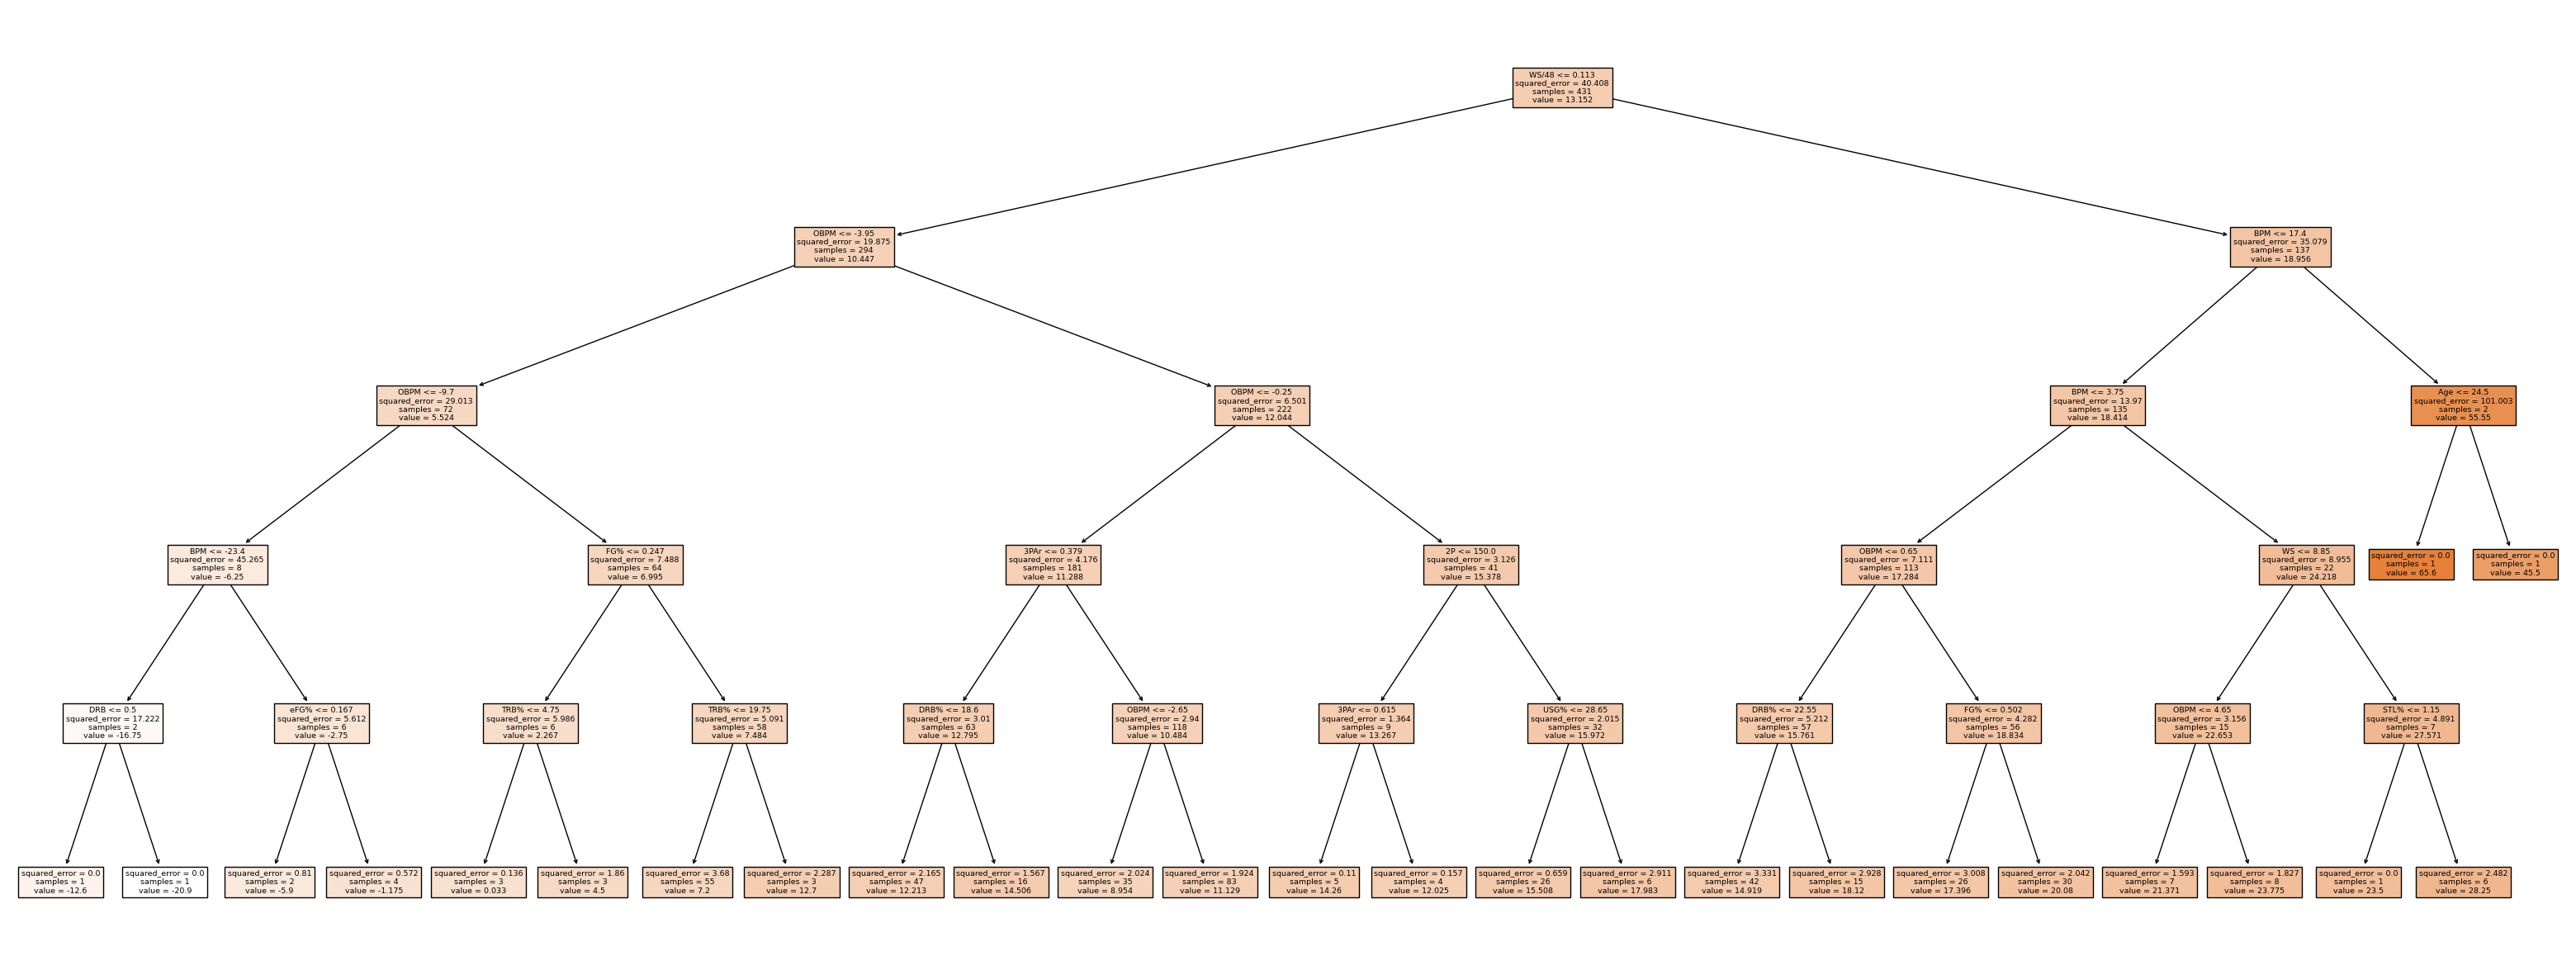

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
!pip install graphviz
import graphviz

print("Feature names:", x.columns)

# Visualizing the decision tree
plt.figure(figsize=(40, 15))  # Adjust the figure size as needed
plot_tree(grid.best_estimator_, filled=True, feature_names=x.columns, class_names=True)
plt.show()

In [ ]:
# Get feature importances
feature_importances = grid.best_estimator_.feature_importances_

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = dict(zip(x.columns, feature_importances))

# Sort the dictionary by importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the features and their importance scores
print("Features Included in the Decision Tree Model:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Features Included in the Decision Tree Model:
WS/48: 0.4116050960269179
OBPM: 0.2750991106236808
BPM: 0.2370667818739521
FG%: 0.015107760920070152
3PAr: 0.014022036563059283
Age: 0.01228762857958604
DRB%: 0.010707806023896276
TRB%: 0.007055035040624264
WS: 0.007022090842731377
2P: 0.0031269146011260033
DRB: 0.002095232130015755
USG%: 0.0018174225754614966
eFG%: 0.0018107075752720016
STL%: 0.0011763766236065265
G: 0.0
GS: 0.0
MP: 0.0
FG: 0.0
FGA: 0.0
3P: 0.0
3PA: 0.0
3P%: 0.0
2PA: 0.0
2P%: 0.0
FT: 0.0
FTA: 0.0
FT%: 0.0
ORB: 0.0
TRB: 0.0
AST: 0.0
STL: 0.0
BLK: 0.0
TOV: 0.0
PF: 0.0
PTS: 0.0
MP.1: 0.0
TS%: 0.0
FTr: 0.0
ORB%: 0.0
AST%: 0.0
BLK%: 0.0
TOV%: 0.0
OWS: 0.0
DWS: 0.0
DBPM: 0.0
VORP: 0.0
